## TUGAS UTS ARTIFICIAL INTELLIGENCE

## Nama : Rizki Valen Mafaza

## NIM : 09011281823134

## Kelas : Sistem Komputer 5 B


Pada tugas kali ini, saya akan memberikan salah satu contoh dalam Pengimplementasian Artificial Neural Networks untuk Pendeteksian Suara (Voice Gender) menggunakan Back Propagation. Saya menggunakan sumber data dari : https://www.kaggle.com/hakanozen/3-layer-artificial-neural-network-from-scratch. Kernel ini menggunakan implementasi 3-layer ANN model explicitly.

### Back Propagation
- Back Propagation adalah salah satu dari Neural Network yang merupakan metode dari Supervised Learning dengan multi-layer network dan memiliki ciri khusus meminimalkan error pada output yang dihasilkan oleh jaringan. Pada proses klasifikasi Backpropagation Neural Network. Classifier bekerja dengan cara melakukan dua tahap perhitungan yaitu perhitungan maju yang akan menghitung nilai kesalahan (error) antara nilai output sistem dengan nilai yang seharusnya dan perhitungan mundur untuk  memperbaiki bobot berdasarkan nilai error tersebut.

### Voice Gender
- Pendeteksian melalui Analisis Suara dan Ucapan.

Database ini dibuat untuk mengidentifikasi suara sebagai suara Pria atau Wanita, berdasarkan ciri-ciri suara dan ucapan. Dataset terdiri dari 3.168 sampel suara yang direkam, dikumpulkan dari pembicara pria dan wanita. Sampel suara diproses sebelumnya dengan analisis acoustic dalam R menggunakan seewave packages dan tuneR, dengan rentang frekuensi yang dianalisis 0hz-280hz (rentang vokal manusia).

## Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # for vizualization
from matplotlib.pyplot import figure # for figuresize

### Read Dataset

In [2]:
voice_data = pd.read_csv("D:/Artificial Intelligence/Tugas UTS/Expilicit algorithms for 3-layer Neural Network/voice.csv")

- pd.read_csv("lokasi dan nama data") berfungsi untuk membaca data yang akan digunakan.

### Preview Data 

In [3]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


- voice_data.head() berfungsi untuk menampilkan 5 baris data teratas,jika parameter n tidak diisi.
- Terdapat 5 baris dan 21 kolom pada dataset tersebut.

### Convert Male to 1 and Female to 0

Mengubah Label Male ataupun Female menjadi nilai 1 atau 0.
- Male : 1
- Female : 0

In [4]:
voice_data.label = [1 if each == "male" else 0 for each in voice_data.label]
voice_data.head() # check if 1-0 conversion worked

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female

## Extract gender (Y_data) and feature (X_data) information

In [5]:
Y_data = voice_data.label.values
X_data = voice_data.drop(["label"], axis = 1)
X_data = (X_data - X_data.min())/(X_data.max() - X_data.min()) # normalization

In [6]:
print(voice_data.shape)
print(X_data.shape)
print(Y_data.shape)

(3168, 21)
(3168, 20)
(3168,)


## Split data for train and test purposes

- Train and Test Split procedure digunakan untuk memperkirakan hasil dari Machine Learning Algorithms saat digunakan untuk membuat prediksi pada data yang tidak digunakan atau dapat juga dikatakan bahwa split berfungsi untuk membagi dataset.
- Spliting adalah data yang ada akan dibagi secara acak dengan presentase 80% untuk data training dan 20% untuk data testing.

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [8]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 2217)
(1, 2217)
(20, 951)
(1, 951)


- Train : data training, data yang terlatih.
- Shape : untuk melihat berapa banyak ukuran data yaitu berupa jumlah dari kolom dan baris yang ada di dalam dataset.

## Create weight and bias for 3-layer neural network ( 2 hidden layers )

Menghitung slope of the loss function sehubungan dengan bobot dan bias. Pada 3 layer neural network, akan mengulang proses untuk parameter z3,2,1 + W3,2,1 (weight) dan b3,2,1 (bias) dengan melakukan backward propagation dari output ke input layer.

In [10]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"W1": np.random.randn(2,x_train.shape[0]) * 0.1,
                  "b1": np.zeros((2,1)),
                  "W2": np.random.randn(2,2) * 0.1,
                  "b2": np.zeros((2,1)),
                  "W3": np.random.randn(1,2) * 0.1,
                  "b3": np.zeros((1,1))}
    
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

In [11]:
print(parameters["W1"].shape)
print(parameters["W2"].shape)
print(parameters["W3"].shape)

(2, 20)
(2, 2)
(1, 2)


In [12]:
print(parameters["b1"].shape)
print(parameters["b2"].shape)
print(parameters["b3"].shape)

(2, 1)
(2, 1)
(1, 1)


### Sigmoid function : sigmoid(x) = 1 / ( 1 + exp(-x) )

In [13]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Sigmoid atau Logistic Activation Function sering disebut sigmoid biner, karena fungsi ini memetakan nilai ke dalam rentang 0 - 1.

### Forward Propagation

In [14]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["W1"],x_train) + parameters["b1"]
    A1 = np.tanh(Z1) # tanh is used as activation function 1
    Z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
    A2 = np.tanh(Z2) # tanh is used as activation function 2
    Z3 = np.dot(parameters["W3"],A2) + parameters["b3"]
    A3 = sigmoid(Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "W1": parameters["W1"],
             "Z2": Z2,
             "A2": A2,
             "W2": parameters["W2"],
             "Z3": Z3,
             "A3": A3,
             "W3": parameters["W3"]}
    
    return A3, cache

A3, cache = forward_propagation_NN(x_train, parameters)

### Compute Cost

In [15]:
def compute_cost_NN(A3, Y, parameters):
    
    logprobs = np.multiply(np.log(A3),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return cost

cost = compute_cost_NN(A3, y_train, parameters)

## Backward Propagation with Gradient Descent

Backward Propagation with Gradient Descent ini merupakan parameter yang digunakan untuk mengukur besarnya pembaruan bobot agar meminimalkan networks loss function.

In [16]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dimension = X.shape[0] # it is 20 for our case
    dZ3 = cache["A3"] - Y # d(cost)/d(Z3)
    dW3 = 1/dimension * np.dot(dZ3,cache["A2"].T) # d(cost)/d(W3)
    db3 = 1/dimension * np.sum(dZ3, axis=1, keepdims=True) # d(cost)/d(b3)
    dZ2 = np.multiply(np.dot(dZ3.T, cache["W3"]).T , 1-np.power(cache["A2"],2)) # d(cost)/d(Z2)
    dW2 = 1/dimension * np.dot(cache["A1"], dZ2.T) # d(cost)/d(W2)
    db2 = 1/dimension * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/d(b2)
    dZ1 = np.multiply(np.dot(dZ2.T, cache["W2"].T).T,1-np.power(cache["A1"],2)) # d(cost)/d(Z1)
    dW1 = 1/dimension * np.dot(dZ1, X.T) # d(cost)/d(W1)
    db1 = 1/dimension * np.sum(dZ1,axis=1, keepdims=True) # d(cost)/d(b1)
    grads = {'dW3':dW3, 
             'db3':db3,
             'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

grads = backward_propagation_NN(parameters, cache, x_train, y_train)

### Set the learning rate

Learning rate adalah hyperparameter yang mengontrol seberapa banyak model yang harus diubah sebagai respons terhadap estimasi error setiap kali bobot model diperbarui.

In [17]:
Learning_Rate = 0.001

## Update weight and bias

Update semua parameter (weight dan bias) dengan mengurangi atau menambahkan nilai weight lama dengan “sebagian” (learning rate) dari nilai gradient yang sudah didapat.

In [18]:
def update_parameters_NN(parameters, grads, learning_rate = Learning_Rate):
    parameters = {"W1": parameters["W1"]-learning_rate*grads["dW1"],
                  "b1": parameters["b1"]-learning_rate*grads["db1"],
                  "W2": parameters["W2"]-learning_rate*grads["dW2"],
                  "b2": parameters["b2"]-learning_rate*grads["db2"],
                  "W3": parameters["W3"]-learning_rate*grads["dW3"],
                  "b3": parameters["b3"]-learning_rate*grads["db3"]}
    
    return parameters

parameters = update_parameters_NN(parameters, grads, learning_rate = Learning_Rate)

### Predict for the test data with updated weight and bias (with updated parameters)

Setelah melakukan update weight dan bias sebelumnya, maka langkah selanjutnya adalah melakukan prediksi untuk pengujian data dengan menggunakan updated parameters.

In [19]:
def predict_NN(parameters,x_test):
    # x_test is the input for forward propagation
    A3, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A3.shape[1]):
        if A3[0,i]<= 0.5: # if smaller than 0.5, predict it as 0
            Y_prediction[0,i] = 0
        else: # if greater than 0.5, predict it as 1
            Y_prediction[0,i] = 1

    return Y_prediction

Y_prediction = predict_NN(parameters,x_test)

## Create 3-layer Neural Network Model

### Artificial Neural Network (ANN)
ANN adalah sekumpulan neuran yang terorganisir dalam lapisan-lapisan (layers) yaitu :
- Input Layer : lapisan yang membawa data masuk ke dalam sistem untuk kemudian di proses pada layer selanjutnya.
- Hidden Layer : Lapisan antara input dan output layer, dimana artificial neuron  yang memiliki sekumpulan input pembobot 'weight' dan prosedur untuk menghasilkan output neuron melalui activation function.
- Output Layer : Lapisan terakhir dari neuron yang menghasilkan output sistem.

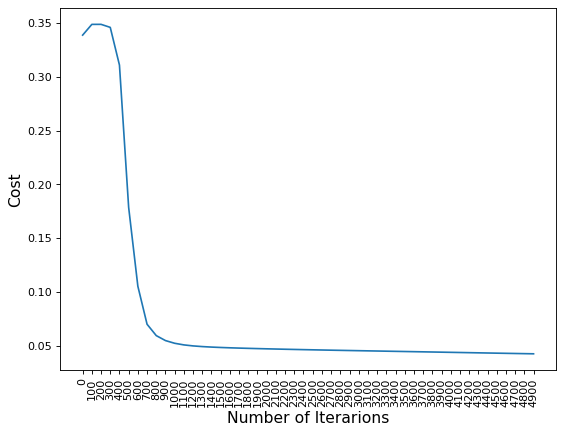

train accuracy: %98.196
test accuracy: %97.371


In [20]:
def three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A3, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A3, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0: # to visualize data in each 100 iteration
            cost_list.append(cost)
            index_list.append(i)

    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarions", fontsize = 14)
    plt.ylabel("Cost", fontsize = 14)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Accuracies
    print("train accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,3)))
    print("test accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,3)))
    return parameters

parameters = three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=5000)

Sesuai Perhitungan diatas, maka didapat hasil outputnya yaitu pada akurasi pelatihan (train accuracy) mendapatkan hasil sebanyak 98.106% dan akurasi pengujian (test accuracy) menghasilkan output sebanyak 97.371%. 